In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df = pd.read_excel('1.4.8.xlsx')
df[[r'$n_{медь}$', r'$\nu_{медь}$, $Гц$']]

,$n_{медь}$,"$\nu_{медь}$, $Гц$"
0,1,3249.5
1,2,6506.2
2,3,9731.2
3,4,12995.7
4,5,16232.0


In [27]:
def graph(key):
    x_name = r'$n_{медь}$'.replace('медь', key)
    y_name = r'$\nu_{медь}$, $Гц$'.replace('медь', key)

    x_data = df[x_name]
    y_data = df[y_name]

   
    try:
        x_sigma = df[r'$\sigma_{n_{медь}}$'.replace('медь', key)]
        y_sigma = df[r'$\sigma_{\nu_{медь}}$'.replace('медь', key)]
    except:
        x_sigma = np.zeros(len(x_data))
        y_sigma = np.zeros(len(y_data))

    # k = (np.mean (y_data * x_data) - np.mean(y_data) * np.mean(x_data)) / (np.mean(x_data**2) - np.mean(x_data)**2)
    # b = np.mean(y_data) - k * np.mean(x_data)
    k = np.mean(x_data * y_data) / np.mean(x_data**2)
    b = 0

    N = len(x_data) # число точек
    # k_sigma = np.sqrt(1/(N-2) * ((np.mean(y_data**2) - np.mean(y_data)**2)/(np.mean(x_data**2) - np.mean(x_data)**2) - k**2))
    # b_sigma = 0  TODO
    k_sigma = np.sqrt(1/(N) * ((np.mean(x_data**2)*np.mean(y_data**2)-np.mean(x_data*y_data)**2)/(np.mean(x_data**2)**2)))
    b_sigma = 0

    plt.figure(figsize=(8,6), dpi=100) # размер графика
    plt.xlabel(x_name) # подписи к осям
    plt.ylabel(y_name) # подписи к осям
    plt.title('Наилучшая прямая для линеаризованной зависимости')
    plt.grid(True, linestyle="--") # сетка

    x_line = np.array([0, max(x_data) * 1.1]) # две точки аппроксимирующей прямой
    y_line = k * x_line + b

    residuals = y_data - (k * x_data + b)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_data - np.mean(y_data))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(x_line, y_line, label=f'$k=({k:.5f}\pm{k_sigma:.5f}) \ Гц$\n$R^2$: ${r_squared:.10f}$')  # Plot the best fit line
    plt.errorbar(x_data, y_data, xerr=x_sigma, yerr=y_sigma, fmt="xr",  label="Экспериментальные точки", ms=5) # точки с погрешностями
    plt.legend() # легенда
    plt.savefig(key + '.png')


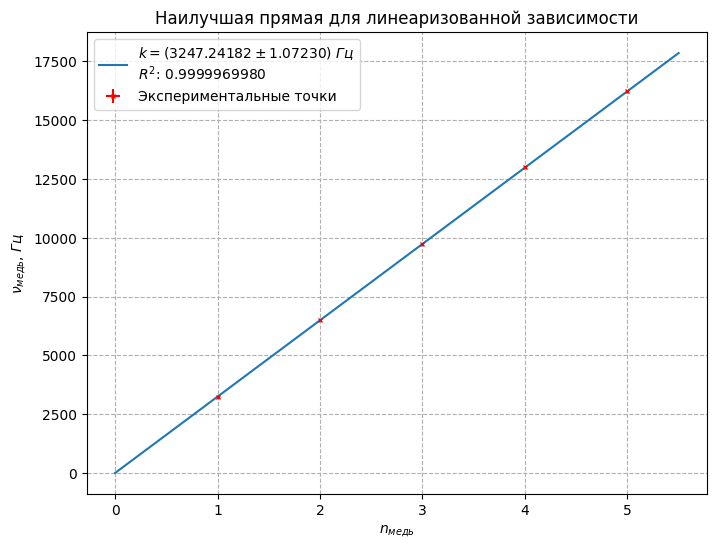

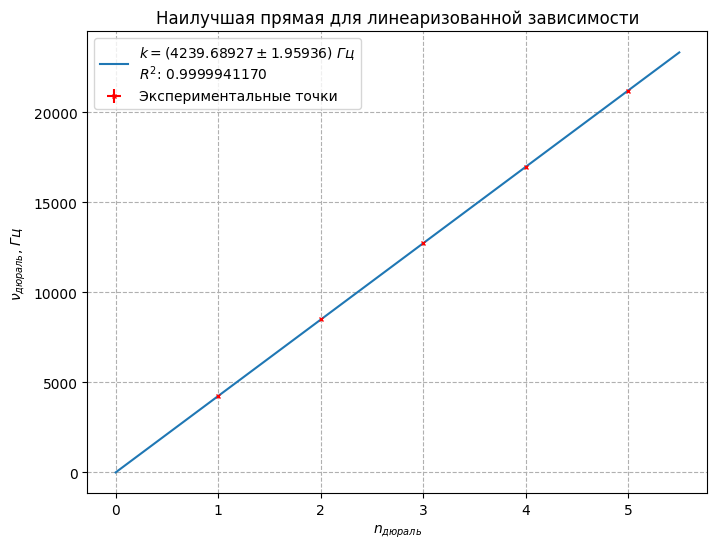

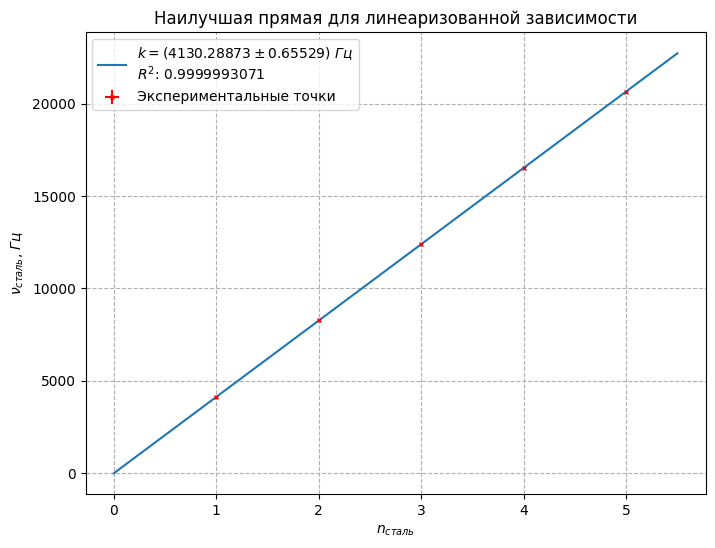

In [28]:
graph('медь')
graph('дюраль')
graph('сталь')

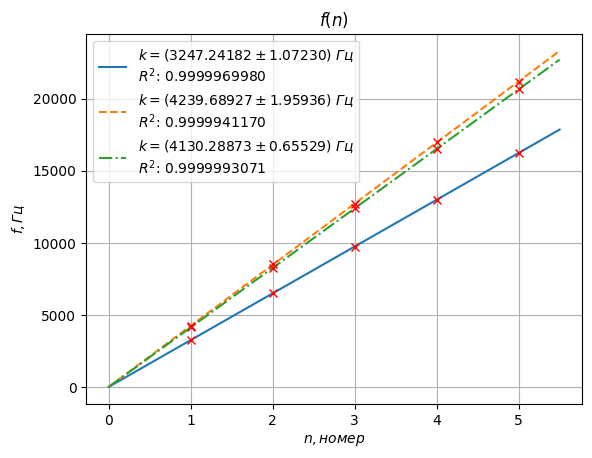

In [37]:
# plt.figure(figsize=(8, 6), dpi=160)
plt.grid(True)
plt.title(r"$f(n)$")
plt.xlabel(r"$n, номер$", fontsize=10)
plt.ylabel(r"$f, Гц$", fontsize=10)


# S = 0.1
# error_S = 5.5 * 10**(-3)

# l = [50, 30, 20]
# error_l = [0,1]*3
styles = ['-', '--', '-.']


coeff_matrix = np.empty((3, 2), dtype=float)
plot_list = [None] * 3
line_labels = []
key_list = ['медь', 'дюраль', 'сталь']
for key in key_list:
    x_name = r'$n_{медь}$'.replace('медь', key)
    y_name = r'$\nu_{медь}$, $Гц$'.replace('медь', key)

    x_data = df[x_name]
    y_data = df[y_name]

   
    try:
        x_sigma = df[r'$\sigma_{n_{медь}}$'.replace('медь', key)]
        y_sigma = df[r'$\sigma_{\nu_{медь}}$'.replace('медь', key)]
    except:
        x_sigma = np.zeros(len(x_data))
        y_sigma = np.zeros(len(y_data))

    # k = (np.mean (y_data * x_data) - np.mean(y_data) * np.mean(x_data)) / (np.mean(x_data**2) - np.mean(x_data)**2)
    # b = np.mean(y_data) - k * np.mean(x_data)
    k = np.mean(x_data * y_data) / np.mean(x_data**2)
    b = 0

    N = len(x_data) # число точек
    # k_sigma = np.sqrt(1/(N-2) * ((np.mean(y_data**2) - np.mean(y_data)**2)/(np.mean(x_data**2) - np.mean(x_data)**2) - k**2))
    # b_sigma = 0  TODO
    k_sigma = np.sqrt(1/(N) * ((np.mean(x_data**2)*np.mean(y_data**2)-np.mean(x_data*y_data)**2)/(np.mean(x_data**2)**2)))
    b_sigma = 0

    # plt.figure(figsize=(8,6), dpi=100) # размер графика
    # plt.xlabel(x_name) # подписи к осям
    # plt.ylabel(y_name) # подписи к осям
    # plt.title('Наилучшая прямая для линеаризованной зависимости')
    # plt.grid(True, linestyle="--") # сетка

    x_line = np.array([0, max(x_data) * 1.1]) # две точки аппроксимирующей прямой
    y_line = k * x_line + b

    residuals = y_data - (k * x_data + b)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_data - np.mean(y_data))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(x_line, y_line, label=f'$k=({k:.5f}\pm{k_sigma:.5f}) \ Гц$\n$R^2$: ${r_squared:.10f}$', linestyle=styles[key_list.index(key)])  # Plot the best fit line
    # plt.errorbar(x_data, y_data, xerr=x_sigma, yerr=y_sigma, fmt="xr",  label="Экспериментальные точки", ms=5) # точки с погрешностями
    plt.plot(x_data, y_data, 'xr')
    # plt.legend() # легенда
    # plt.savefig(key + '.png')

# plt.legend(handles=plot_list, loc=4, labels=line_labels, fontsize=13)
# print(coeff_matrix)
# plt.gca().set_aspect(.5)
plt.legend(handles=key_list, labels=line_labels)
plt.savefig('все.png')